In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
# data_time = pd.read_csv('D:\Study\Master_SpringSemester\Course\CE 290\StemGNN_CE290/new_model\save.csv')
data_time = pd.read_csv('../new_model/save.csv')
# print(data_time.head(10))
data_time = np.array(data_time).T

In [37]:
adj_example = pd.read_csv('../dataset/data_for_adjc_20230414updated/mar2020.csv', header=None)
# Drop the first row
adj_example = adj_example.iloc[1:]
# Set row 1 (now the first row) as the column names
adj_example.columns = adj_example.iloc[0]
# Drop the row that is now the column names
adj_example = adj_example.iloc[1:]
adj_example.reset_index(drop=True, inplace=True)
adj_dept_arr = adj_example[['Departure', 'Arrival']].iloc[:-5]

In [2]:
adj_example = pd.read_csv('../dataset/data_for_adjc_20230414updated/aapprr2020.csv')
adj_dept_arr = adj_example[['Departure', 'Arrival']].iloc[:-5]

In [5]:
adj_example

,Departure,Arrival,a,b,a.1,b.1,a.2,b.2,a.3,b.3,a.4,b.4,a.5,b.5,a.6,b.6,a.7
0,ABQ,ATL,20-Apr,10,100.00,90.00,90.00,0.0,0.00,0.50,4.25,15.70,1.60,2.10,0.30,3.80,2.60
1,ABQ,AUS,20-Apr,21,95.24,95.24,100.00,0.0,0.00,1.05,1.74,9.19,1.48,2.33,0.22,0.33,0.19
2,ABQ,BWI,20-Apr,12,100.00,100.00,100.00,0.0,0.00,0.42,1.96,9.33,2.00,3.92,0.08,0.00,0.00
3,ABQ,DAL,20-Apr,75,100.00,98.67,100.00,0.0,0.00,0.23,1.63,8.88,0.91,5.01,0.24,0.20,0.31
4,ABQ,DEN,20-Apr,84,98.81,98.81,98.81,0.0,0.00,0.27,3.92,12.56,1.08,1.94,1.28,1.15,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865,Total :,NaN,NaN,"124,300",95.02,93.81,95.06,22.0,64.86,2.33,2.06,12.08,3.08,1.81,1.09,1.38,2.41
2866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2867,Report created on Sat Apr 15 02:40:15 EDT 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2868,Sources: Aviation System Performance Metrics (...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# adj_dept_arr['Departure'].unique()
# adj_dept_arr['Arrival'].unique()

In [3]:
unique_airports = np.unique(np.concatenate((adj_dept_arr['Departure'].unique(), adj_dept_arr['Arrival'].unique())))
num_airports = len(unique_airports)
adjacency_matrix = np.zeros((num_airports, num_airports))
for _, row in adj_dept_arr.iterrows():
    departure_index = np.where(unique_airports == row['Departure'])[0][0]
    arrival_index = np.where(unique_airports == row['Arrival'])[0][0]
    adjacency_matrix[departure_index, arrival_index] = 1

In [14]:
matrix_77x77 = np.zeros((77, 77))
matrix_77x77[:76, :76] = np.array(adjacency_matrix)
new_row = np.random.choice([0, 1], size=76)
new_column = np.random.choice([0, 1], size=76)
matrix_77x77[-1, :-1] = new_row
matrix_77x77[:-1, -1] = new_column
matrix_77x77[76, 76] = 0
adjacency_matrix = matrix_77x77

## Generate spatial weight matrix randomly

In [3]:
def random_binary_matrix(size, probability):
    matrix = np.random.choice([0, 1], size=(size, size), p=[1 - probability, probability])
    np.fill_diagonal(matrix, 0)
    return matrix

# size = 77
# probability = 0.8
# adj_matrix = random_binary_matrix(size, probability)

In [15]:
adj_matrix = adjacency_matrix
row_sums = adj_matrix.sum(axis=1, keepdims=True)
spatial_weight_matrix = adj_matrix / row_sums

weighted_flight_data = np.empty(data_time.shape)

for i in range(data_time.shape[0]):
    weighted_flight_data[i] = data_time[i] @ spatial_weight_matrix

diff = weighted_flight_data - data_time

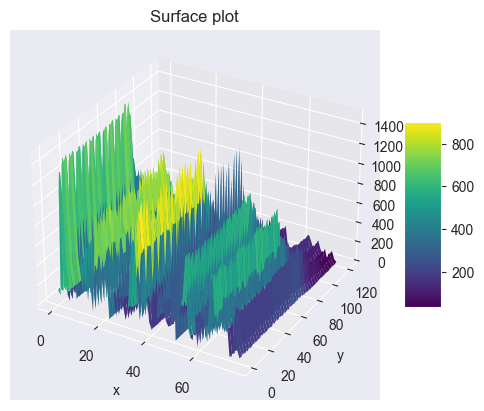

In [16]:
# plot data_time as a surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x = np.arange(0, 77, 1)
y = np.arange(0, 121, 1)
x, y = np.meshgrid(x, y)
z = data_time
surf = ax.plot_surface(x, y, z, cmap='viridis', linewidth=0)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Surface plot')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

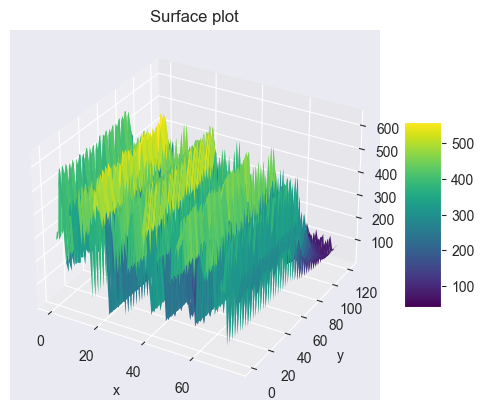

In [17]:
# plot weighted_flight_data as a surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x = np.arange(0, 77, 1)
y = np.arange(0, 121, 1)
x, y = np.meshgrid(x, y)
z = weighted_flight_data
surf = ax.plot_surface(x, y, z, cmap='viridis', linewidth=0)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Surface plot')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

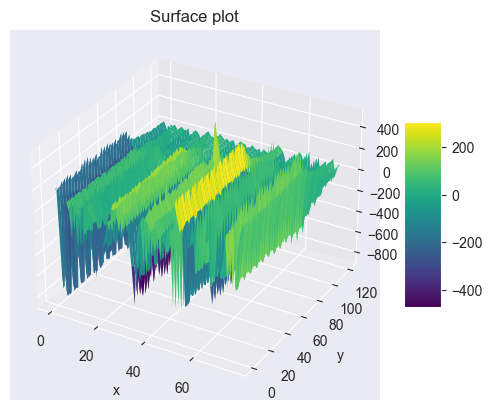

In [18]:
# plot diff as a surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x = np.arange(0, 77, 1)
y = np.arange(0, 121, 1)
x, y = np.meshgrid(x, y)
z = diff
surf = ax.plot_surface(x, y, z, cmap='viridis', linewidth=0)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Surface plot')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
